In [1]:


pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kapna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kapna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kapna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------ ----------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kapna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 26.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kapna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
from tabulate import tabulate
import missingno as msno
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
# Chemins des fichiers
file_path_reviews = r"C:\Users\kapna\Documents\GitHub\Recommandation-DATA-MINING\recommEngine-master\data\1000_reviews.json"
file_path_products = r"C:\Users\kapna\Documents\GitHub\Recommandation-DATA-MINING\recommEngine-master\data\500.json"
 
# Charger les fichiers JSON
df_reviews = pd.read_json(file_path_reviews, lines=True, encoding='utf-8')
df_products = pd.read_json(file_path_products, lines=True, encoding='utf-8')
 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
 
# Afficher un aperçu des données
print(tabulate(df_reviews.head(), headers='keys', tablefmt='grid'))
print(tabulate(df_products.head(), headers='keys', tablefmt='grid'))
 
# verifier la structure des données
print(df_reviews.info())
print(df_products.info())
 

+----+----------------+------------+------------------------------+-----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+----------------------------+------------------+--------------+
|    | reviewerID     | asin       | reviewerName                 | helpful   | reviewText                                                                                             

les valeurs manquantes dans le reviews
reviewerID        0
asin              0
reviewerName      3
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

les valeurs manquantes dans les produits
asin            0
title           0
imUrl           0
related       189
salesRank      81
categories      0
price         200
brand         315
dtype: int64


<Axes: >

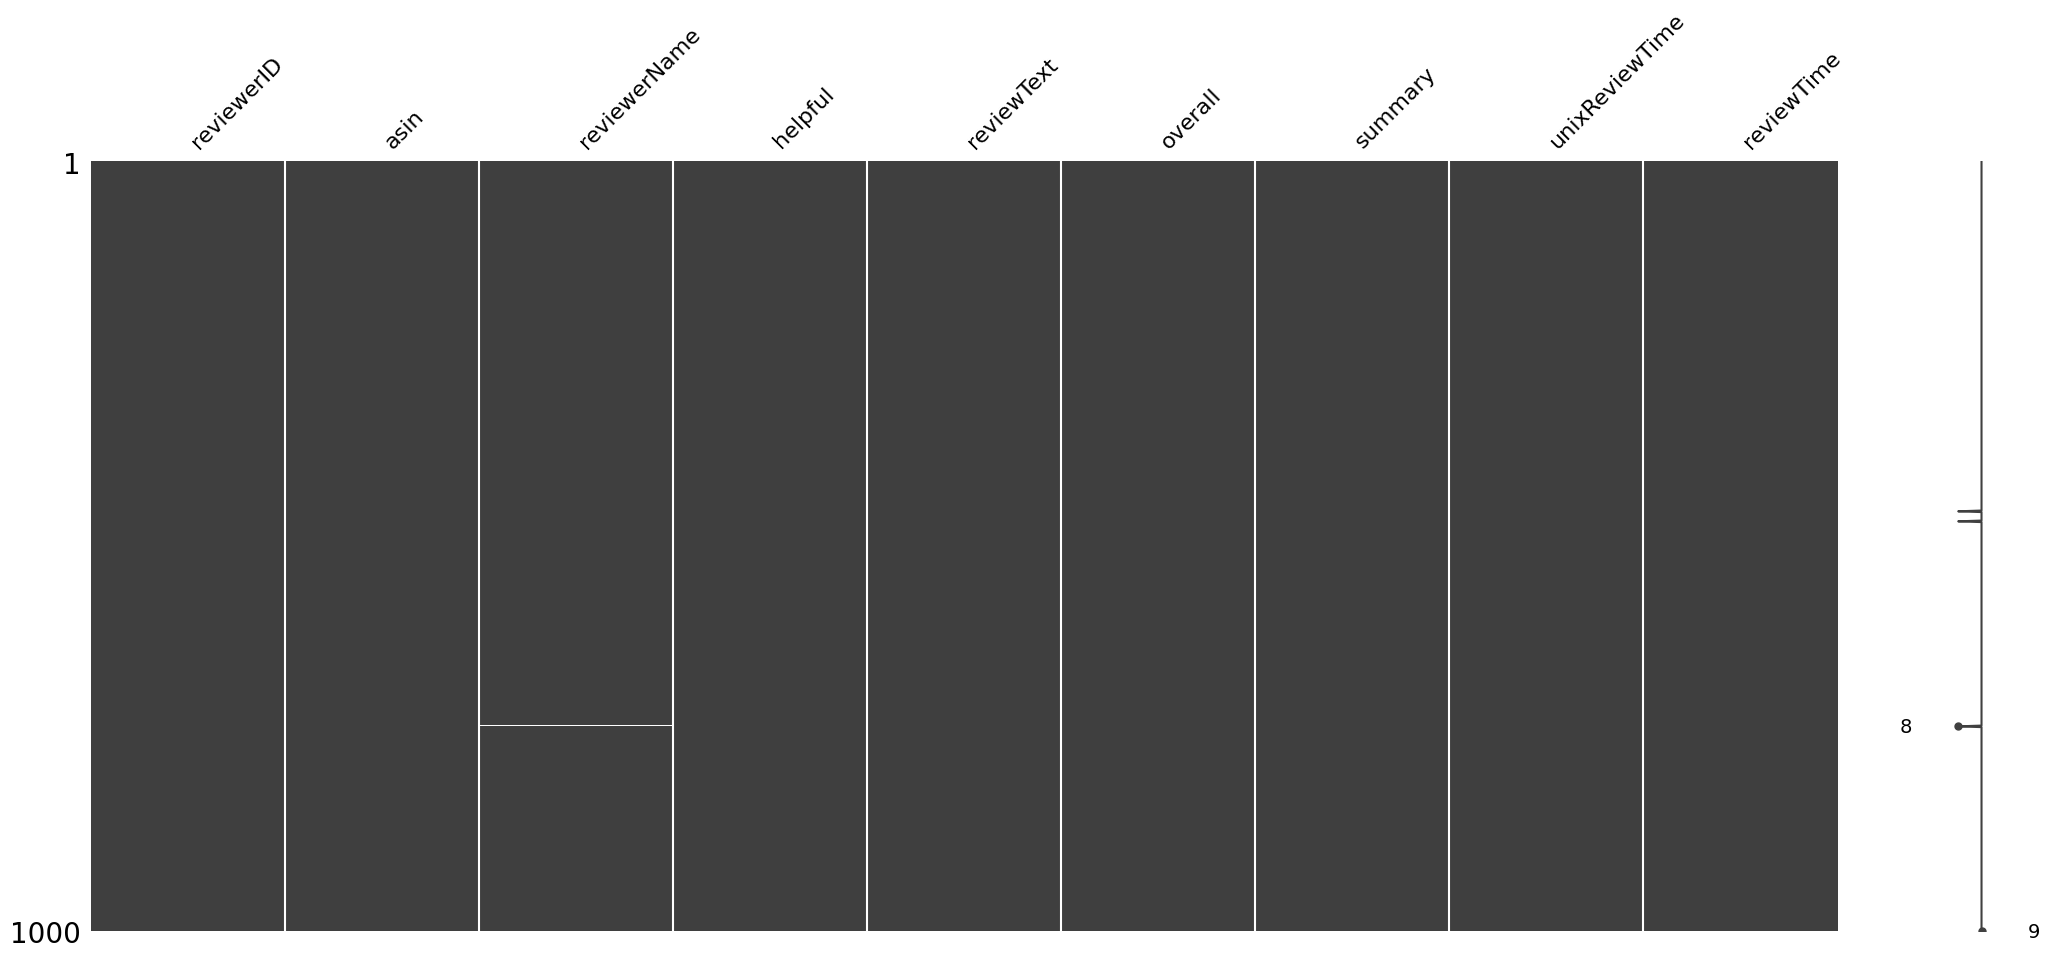

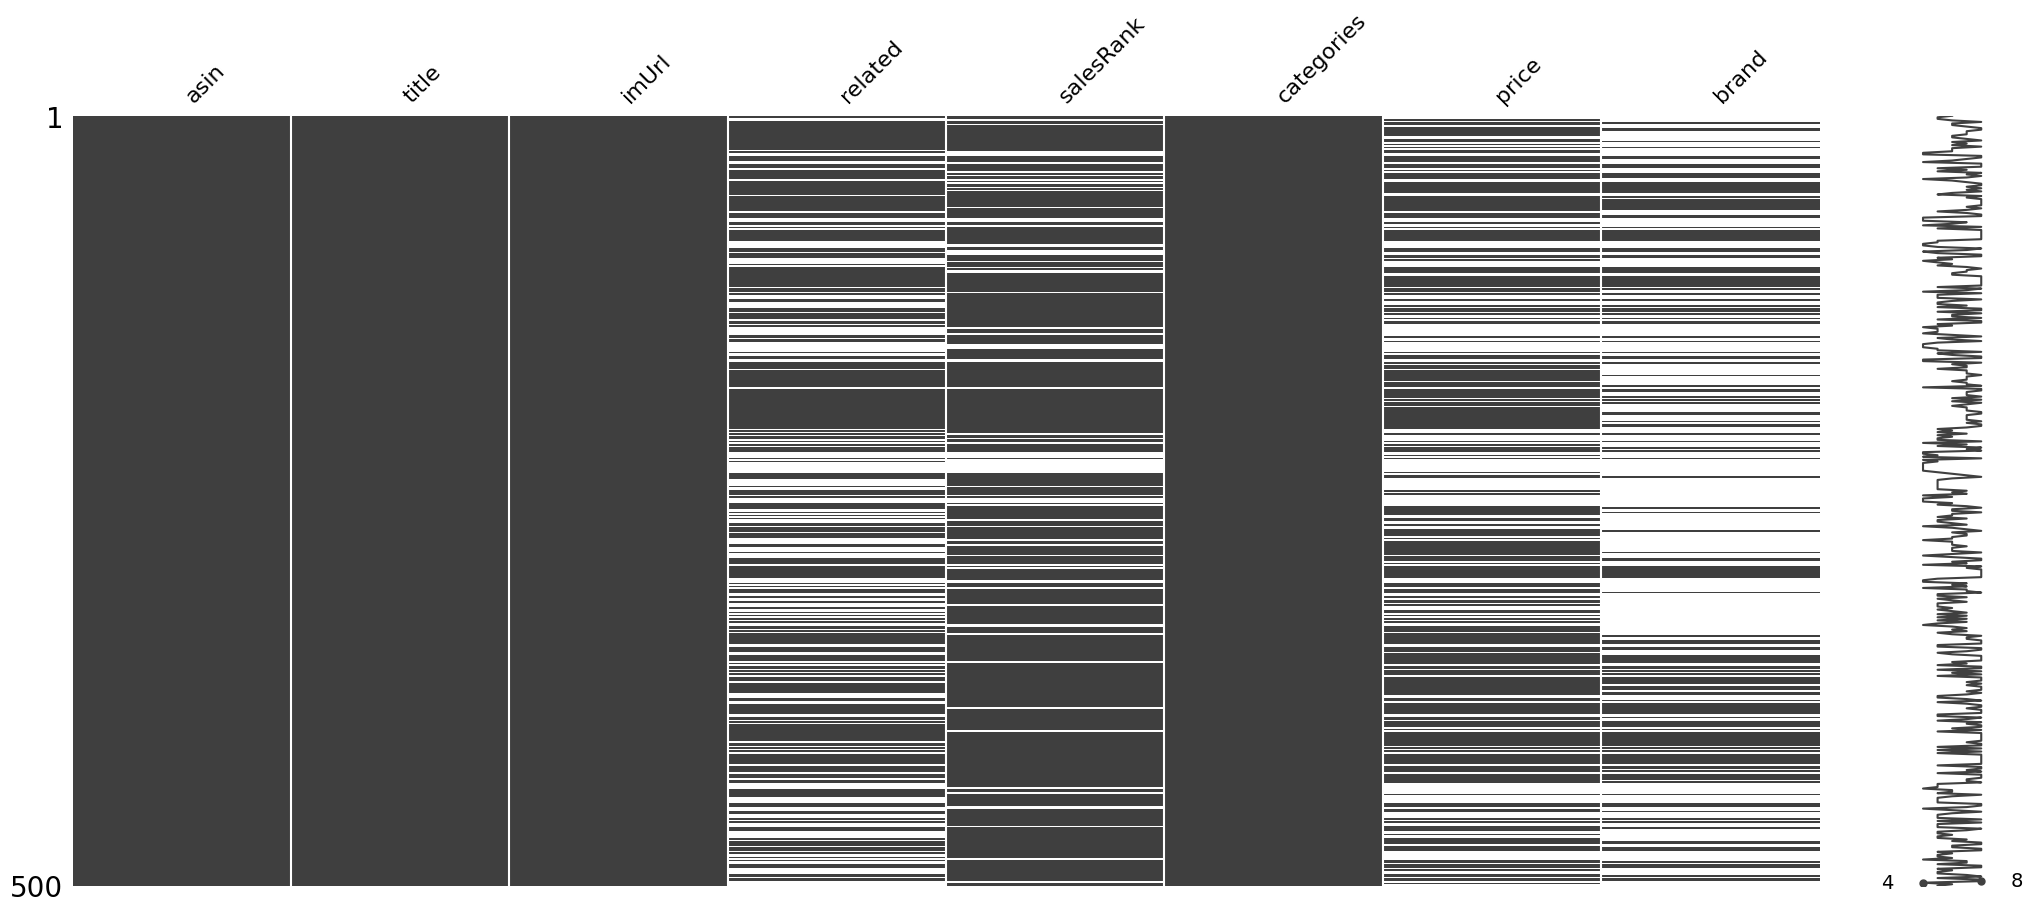

In [8]:
#identification des valeurs manquantes
reviews_missing = df_reviews.isnull().sum()
products_missing = df_products.isnull().sum()
print("les valeurs manquantes dans le reviews")
print(reviews_missing)
print("\nles valeurs manquantes dans les produits")
print(products_missing)
#visualisation des valeurs manquantes
msno.matrix(df_reviews)
msno.matrix(df_products)

In [9]:
#traitement des valeus manquante
df_products['price'] = df_products['price'].fillna(df_products['price'].mean()) # Remplacer NaN par la moyenne
df_products['brand'] = df_products['brand'].fillna('Non précisé')  # Remplacer NaN par 'Non précisé'
df_products['related'] = df_products['related'].apply(lambda x: x if isinstance(x, dict) else {}) #remplacé nan par une liste vide {}
df_products['salesRank'] = df_products['salesRank'].apply(lambda x: x if isinstance(x, dict) else {})# remplacé nan par un dictinaire vide
 
 
 
df_reviews['reviewerName'] = df_reviews['reviewerName'].fillna('Anonyme')
 
print("Valeurs manquantes dans df_reviews :")
print(df_reviews.isnull().sum())
print("\nValeurs manquantes dans df_products :")
print(df_products.isnull().sum())

Valeurs manquantes dans df_reviews :
reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

Valeurs manquantes dans df_products :
asin          0
title         0
imUrl         0
related       0
salesRank     0
categories    0
price         0
brand         0
dtype: int64


In [ ]:
#etant donnée qu'on a des listes dans nos colonnes , il nus ait impossible de verifier les dooublons.
#pour résoudre le probleme, on converti les listes en tuples

df_reviews = df_reviews.applymap(lambda x: tuple(x) if isinstance(x, list) else x)
df_products = df_products.applymap(lambda x: tuple(x) if isinstance(x, list) else x)



C:\Users\kapna\AppData\Local\Temp\ipykernel_13124\2754382191.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_reviews = df_reviews.applymap(lambda x: tuple(x) if isinstance(x, list) else x)
C:\Users\kapna\AppData\Local\Temp\ipykernel_13124\2754382191.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_products = df_products.applymap(lambda x: tuple(x) if isinstance(x, list) else x)


In [22]:
#etant donnée qu'on a des dictionnaires dans nos colonnes , il nus ait impossible de verifier les dooublons.
#pour résoudre le probleme, on converti les dictionnaires en tuples

def convert_dict_to_tuple(d):
    if isinstance(d, dict):
        return tuple(sorted(d.items()))
    return d

df_reviews = df_reviews.applymap(convert_dict_to_tuple)
df_products = df_products.applymap(convert_dict_to_tuple)


C:\Users\kapna\AppData\Local\Temp\ipykernel_13124\3407869290.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_reviews = df_reviews.applymap(convert_dict_to_tuple)
C:\Users\kapna\AppData\Local\Temp\ipykernel_13124\3407869290.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_products = df_products.applymap(convert_dict_to_tuple)


In [4]:
import pandas as pd


# Vérifier les doublons
doublons = df_reviews[df_reviews.duplicated()]

# Afficher les doublons
print(f"Nombre de doublons trouvés: {doublons.shape[0]}")
print(doublons)


TypeError: unhashable type: 'list'

In [35]:

# Fonction pour convertir les listes en tuples
def convert_to_tuple(x):
    if isinstance(x, list):
        return tuple(x)
    return x

# Appliquer la fonction à la colonne 'related'
df_products['related'] = df_products['related'].apply(convert_to_tuple)

# Vérification des doublons
doublons_reviews = df_reviews.duplicated()
doublons_products = df_products.duplicated()
print("\nDoublons détectés dans les avis:", doublons_reviews.sum())
print("Doublons détectés dans les produits:", doublons_products.sum())

TypeError: unhashable type: 'list'

In [39]:

# Suppression des doublons
df_reviews_sans_doublons = df_reviews.drop_duplicates()
df_products_sans_doublons = df_products.drop_duplicates()
print("\nDataFrame des avis sans doublons:")
print(tabulate(df_reviews_sans_doublons.head(), headers='keys', tablefmt='grid'))
print("\nDataFrame des produits sans doublons:")
print(tabulate(df_products_sans_doublons.head(), headers='keys', tablefmt='grid'))

# Vérifier la structure des données après suppression des doublons
print(df_reviews_sans_doublons.info())
print(df_products_sans_doublons.info())

TypeError: unhashable type: 'list'

In [14]:

# Initialiser l'analyseur de sentiments
sia = SentimentIntensityAnalyzer()

# Exemple d'avis client
avis = "J'adore ce produit, il est vraiment excellent !"

# Analyse du sentiment
score = sia.polarity_scores(avis)

# Affichage des résultats
print(f"Sentiment positif: {score['pos']}")
print(f"Sentiment neutre: {score['neu']}")
print(f"Sentiment négatif: {score['neg']}")

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\kapna/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\kapna\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
